## Title: Exploratory data analysis of Credit card default data set

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')
# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Summary of the dataset
This data set comes from https://archive-beta.ics.uci.edu/ml/datasets/default+of+credit+card+clients, default of credit card clients. (2016). UCI Machine Learning Repository. There are 30000 observations and 25 columns in the dataset. There are 0 observations with missing values in the data set. 

### Partition the data set into training and test sets
Before proceeding further, we will split the data with a test size set to 0.3 such that 70% of observations are in the training set and 30% of observations are in the test set.

|Data Partition|Default Cases|Not Default Cases|
|--------------|-------------|-----------------|
|Train         |4616         |16384            |
|Test          |2020         |6980             |

There is a obvious class imbalance in the data set.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
credit_card = pd.read_excel(url, skiprows=1)
credit_card.shape

(30000, 25)

In [3]:
print(credit_card.columns.to_list())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
credit_card.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
train_df, test_df = train_test_split(credit_card, test_size=0.3, random_state=111)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6900,6901,230000,2,2,2,31,-1,-1,-1,-1,...,10452,5978,62292,4317,1421,10452,700,57229,2500,0
9941,9942,30000,2,2,2,22,0,0,2,0,...,30720,28298,9064,3500,0,3500,694,343,266,0
15626,15627,200000,2,2,2,33,-1,2,2,-2,...,0,0,4549,0,0,0,0,4549,0,0
6063,6064,320000,2,1,2,33,-2,-2,-2,-2,...,-347,-347,13694,0,0,0,0,14041,1613,0
25083,25084,210000,1,2,1,47,1,-1,-1,-2,...,-204,-204,-204,296,0,0,0,0,0,0


In [7]:
train_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7443,7444,170000,1,3,2,26,2,0,0,0,...,61408,59390,57037,5020,3003,3009,2013,3041,3000,1
4182,4183,80000,1,2,2,28,0,0,0,0,...,26034,26615,28173,1412,1425,931,1000,2000,2000,0
4820,4821,90000,2,1,2,29,0,0,0,0,...,89532,90362,94337,4200,4000,3307,3453,6730,0,0
10196,10197,50000,2,2,1,41,2,3,2,2,...,29684,29078,29944,0,1000,1500,0,1500,2100,0
12116,12117,120000,1,3,1,46,0,-1,0,0,...,89913,88484,90477,120656,3520,2931,3180,3432,1116,0


In [8]:
train_df['default payment next month'].value_counts()

0    16384
1     4616
Name: default payment next month, dtype: int64

In [9]:
test_df['default payment next month'].value_counts()

0    6980
1    2020
Name: default payment next month, dtype: int64

In [10]:
train_df.SEX.value_counts()

2    12625
1     8375
Name: SEX, dtype: int64

In [11]:
train_df.EDUCATION.value_counts()

2    9807
1    7427
3    3447
5     194
4      80
6      33
0      12
Name: EDUCATION, dtype: int64

In [12]:
train_df.MARRIAGE.value_counts()

2    11124
1     9609
3      228
0       39
Name: MARRIAGE, dtype: int64

In [13]:
def transfer1(x):
    if x == 1:
        return 'married'
    elif x == 2:
        return 'single'
    else:
        return 'others'
    
def transfer2(x):
    if x == 1:
        return 'graduate school'
    elif x == 2:
        return 'university'
    elif x == 3:
        return 'high school'
    else:
        return 'others'
    

train_df['default payment next month'] = train_df['default payment next month'].apply(lambda x: 'Default' if x==1 else 'Not default')
train_df['SEX'] = train_df['SEX'].apply(lambda x: 'male' if x==1 else 'female')
train_df['MARRIAGE'] = train_df['MARRIAGE'].apply(transfer1)
train_df['EDUCATION'] = train_df['EDUCATION'].apply(transfer2)


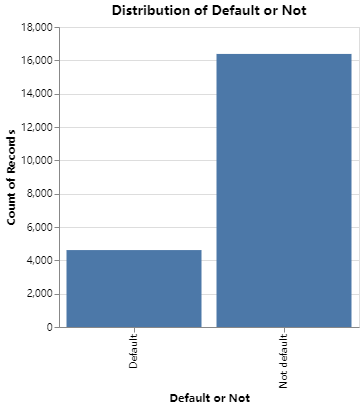

In [14]:


alt.Chart(pd.DataFrame(train_df['default payment next month'].apply(str)), title='Distribution of Default or Not').mark_bar().encode(
    x=alt.X('default payment next month', title='Default or Not'),
    y='count()'
).properties(
    width=300,
    height=300
)

In [16]:
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6900,6901,230000,female,university,single,31,-1,-1,-1,-1,...,10452,5978,62292,4317,1421,10452,700,57229,2500,Not default
9941,9942,30000,female,university,single,22,0,0,2,0,...,30720,28298,9064,3500,0,3500,694,343,266,Not default
15626,15627,200000,female,university,single,33,-1,2,2,-2,...,0,0,4549,0,0,0,0,4549,0,Not default
6063,6064,320000,female,graduate school,single,33,-2,-2,-2,-2,...,-347,-347,13694,0,0,0,0,14041,1613,Not default
25083,25084,210000,male,university,married,47,1,-1,-1,-2,...,-204,-204,-204,296,0,0,0,0,0,Not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,7444,170000,male,high school,single,26,2,0,0,0,...,61408,59390,57037,5020,3003,3009,2013,3041,3000,Default
4182,4183,80000,male,university,single,28,0,0,0,0,...,26034,26615,28173,1412,1425,931,1000,2000,2000,Not default
4820,4821,90000,female,graduate school,single,29,0,0,0,0,...,89532,90362,94337,4200,4000,3307,3453,6730,0,Not default
10196,10197,50000,female,university,married,41,2,3,2,2,...,29684,29078,29944,0,1000,1500,0,1500,2100,Not default


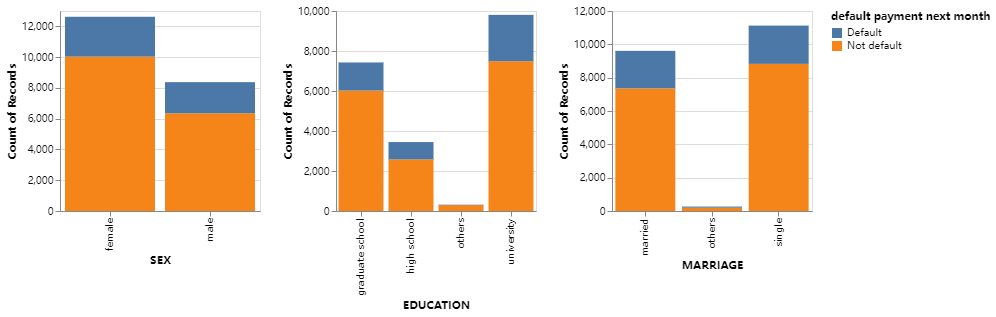

In [69]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='nominal', stack=True),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['SEX', 'EDUCATION', 'MARRIAGE']
)

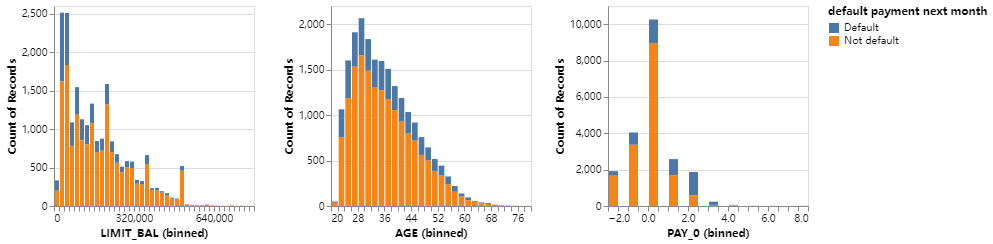

In [50]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['LIMIT_BAL', 'AGE', 'PAY_0']
)

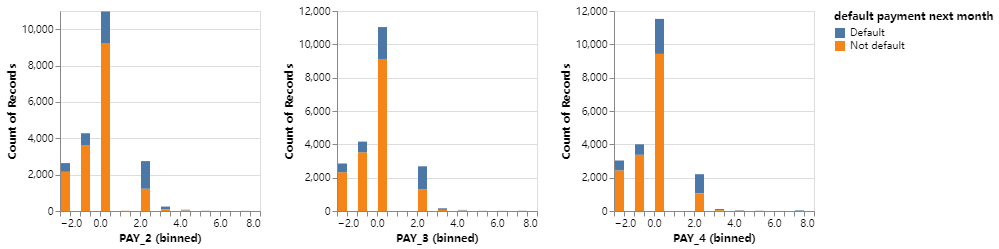

In [51]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['PAY_2', 'PAY_3', 'PAY_4']
)

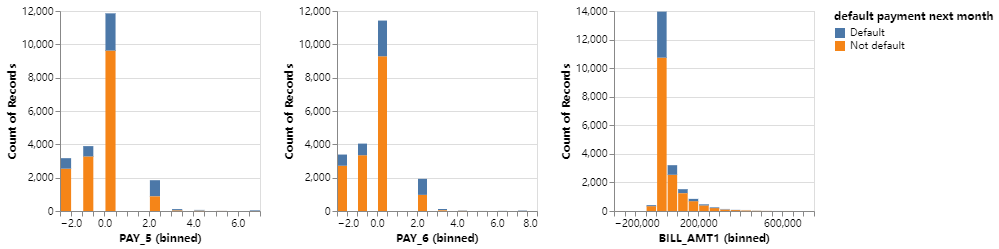

In [52]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['PAY_5', 'PAY_6', 'BILL_AMT1']
)

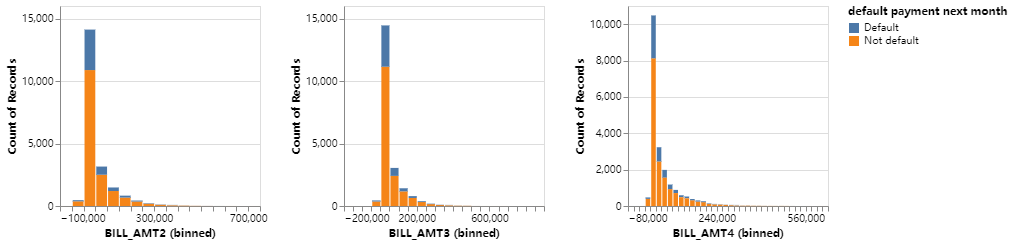

In [53]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4']
)

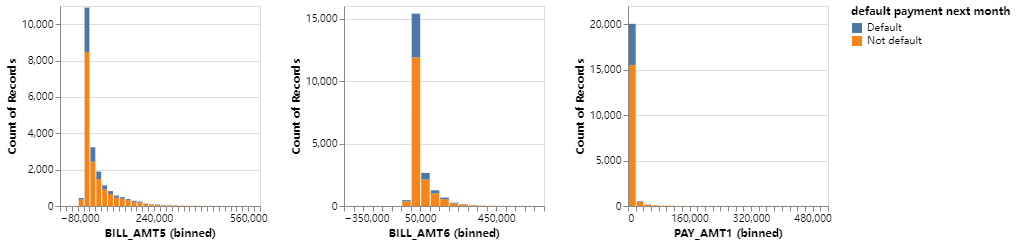

In [70]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1']
)

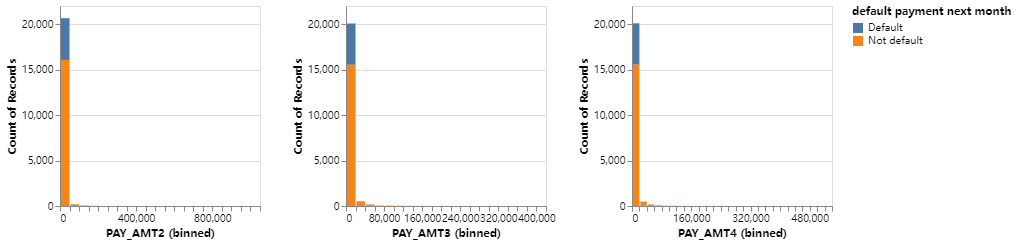

In [55]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']
)

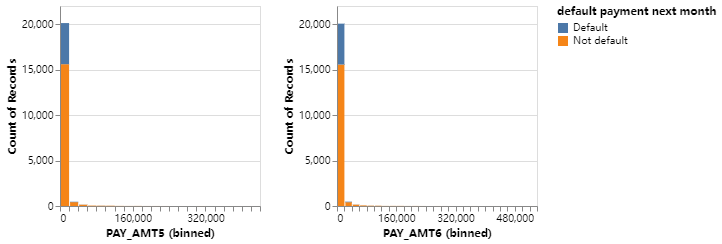

In [57]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default payment next month'
).properties(
    width=200,
    height=200
).repeat(
    ['PAY_AMT5', 'PAY_AMT6',])